In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 22})


In [9]:
Leistung1 = 100/7740 * np.array([7740, 7493, 7145, 6975, 6032, 6218])
Leistung2 = 100/8712 * np.array([8712, 8411, 7739, 7851, 7424, 6513])

Error1 = 0.05 * Leistung1
Error2 = 0.05 * Leistung2
Postion = np.linspace(1,6,6)

In [10]:
def func(x, m, n):

    return m * x + n

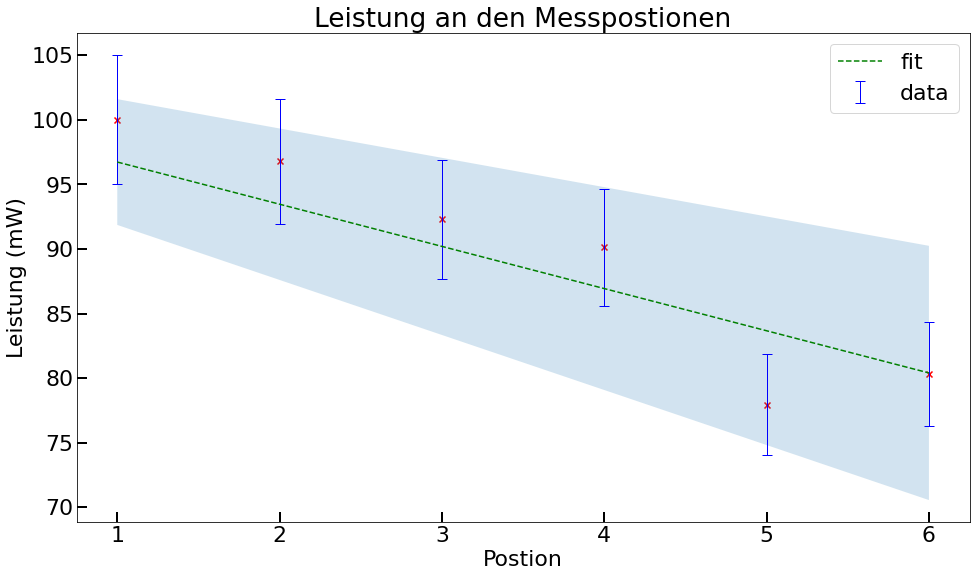

In [15]:
plt.scatter(Postion, Leistung1, marker='x', color = 'red')
plt.errorbar(Postion, Leistung1, yerr=Error1, label='data', capsize=5, color='black', linewidth=1, ecolor = 'Blue', ls='none')
plt.tick_params(direction="in", length=10, width=2)
plt.xlabel('Postion') 
plt.ylabel('Leistung (mW)')
plt.title('Leistung an den Messpostionen')


popt, pcov = curve_fit(func, Postion, Leistung1, bounds=([-10,0],[0,100]))


y_true = Leistung1
y_pred = func(Postion, *popt)
r2 = r2_score(y_true, y_pred)


pot_up = popt +  np.sqrt(np.diag(pcov))
pot_down = popt -  np.sqrt(np.diag(pcov))
Up = func(Postion, *pot_up)
Down = func(Postion, *pot_down)
plt.fill_between(Postion, Up, Down, alpha=0.2)
plt.plot(Postion, func(Postion, *popt), 'g--', label='fit' )
#print(popt)
#print(np.diag(pcov)[0])
#print(np.diag(pcov)[1])
#print(r2)
plt.legend()
plt.savefig("Verluste_Arm1.png")

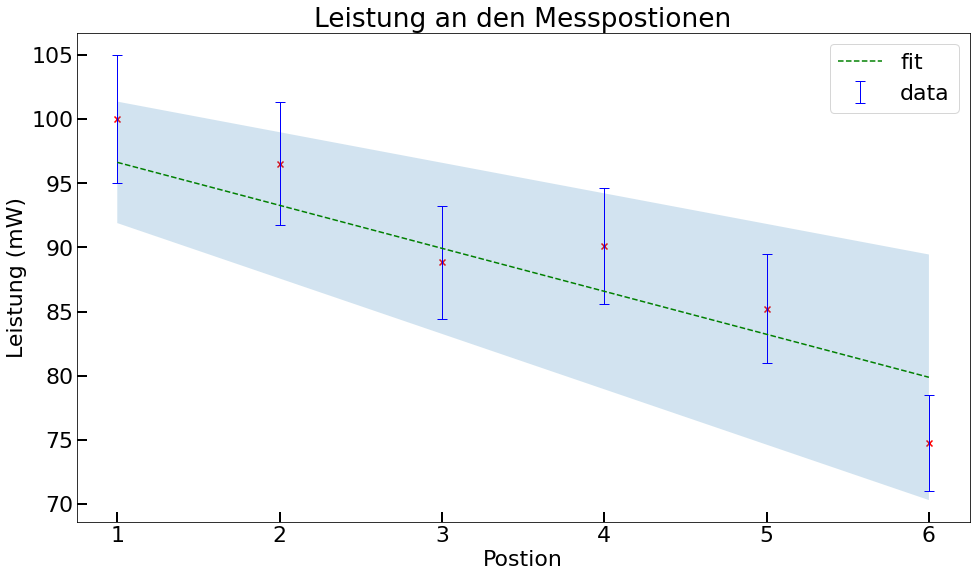

In [16]:
plt.scatter(Postion, Leistung2, marker='x', color = 'red')
plt.errorbar(Postion, Leistung2, yerr=Error2, label='data', capsize=5, color='black', linewidth=1, ecolor = 'Blue', ls='none')
plt.tick_params(direction="in", length=10, width=2)
plt.xlabel('Postion') 
plt.ylabel('Leistung (mW)')
plt.title('Leistung an den Messpostionen')
#plt.ylim(65,100)

popt, pcov = curve_fit(func, Postion, Leistung2, bounds=([-10,0],[0,100]))

y_true = Leistung2
y_pred = func(Postion, *popt)
r2 = r2_score(y_true, y_pred)


pot_up = popt +  np.sqrt(np.diag(pcov))
pot_down = popt -  np.sqrt(np.diag(pcov))
Up = func(Postion, *pot_up)
Down = func(Postion, *pot_down)
plt.fill_between(Postion, Up, Down, alpha=0.2)
plt.plot(Postion, func(Postion, *popt), 'g--', label='fit' )

#print(popt)
#print(np.diag(pcov))
#print(r2)
plt.legend()
plt.savefig("Verluste_Arm2.png")

In [17]:
y_true = Leistung1
y_pred = func(Postion, *popt)
r2_score(y_true, y_pred)

0.8203156551331291

In [18]:
y_true = Leistung2
y_pred = func(Postion, *popt)
r2_score(y_true, y_pred)

0.8341655107367417